# Borrower Reliability Study

The customer is the credit department of the bank. It is necessary to put forward hypotheses based on general information about clients, what factors can influence the repayment of the loan on time.
The results of the study will be taken into account when building a credit scoring model - a special system that assesses the ability of a potential borrower to repay a loan to a bank
Data - statistics on the solvency of customers, provided by customers in the form of `.csv`

## Import basic libraries and data sources

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Resume**

1. The table has 12 columns (4 of which are numeric, 8 are categorical or binary) and 21525 rows, each row provides information about a bank client, including information about marital status and children.
2. Column names are correct in accordance with the style.
3. There are missing values in the data (`days_employed` and `total_income` columns).
4. Also on the first 10 lines, you can already notice implicit duplicates (different case in the `education` column, as well as anomalies (for example, negative values in the `days_employed` column).
The first stage of the project will be data preprocessing.

## Data preprocess

### Missing values

In [3]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

`days_employed` and `total_income` have missing values (2174)

**Let's display the table with only missing values:**

In [4]:
df[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


It can be concluded that the omissions are not associated with any specific parameter: omissions occur in all categories of marital status, type of income, credit purposes, gender. Most likely, these omissions are accidental, users did not leave this data.

**Let's check Percentage of missing values in each of the missing columns:**

In [5]:
print(f"Percentage of missing values in a column days_employed {1 - df['days_employed'].count() / df['children'].count():.01%}")
print(f"Percentage of missing values in a column total_income {1 - df['total_income'].count() / df['children'].count():.01%}")

Percentage of missing values in a column days_employed 10.1%
Percentage of missing values in a column total_income 10.1%


The gaps take up 10% of all rows, which is quite a lot of data, so deleting rows with 'None' may skew further results. Since the number of days and the amount of incoming funds are quantitative variables, gaps can be replaced by characteristic values (arithmetic mean or median).
Both of these parameters determine the center values in the sample. But since we have a large number of variables, some of which will be uncharacteristic for the sample under study, too large or too small, it is more correct to use the median to estimate the center.

**`total_income`**

In [6]:
df.loc[df['total_income'].isnull(), 'income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

In [7]:
medians_total_income = df.groupby('income_type')['total_income'].median().astype('int')
medians_total_income

income_type
безработный        131339
в декрете           53829
госслужащий        150447
компаньон          172357
пенсионер          118514
предприниматель    499163
сотрудник          142594
студент             98201
Name: total_income, dtype: int64

In [8]:
df.loc[(df['total_income'].isnull()) & (df['income_type'] == 'сотрудник'), 'total_income'] = medians_total_income[6]
df.loc[(df['total_income'].isnull()) & (df['income_type'] == 'компаньон'), 'total_income'] = medians_total_income[3]
df.loc[(df['total_income'].isnull()) & (df['income_type'] == 'пенсионер'), 'total_income'] = medians_total_income[4]
df.loc[(df['total_income'].isnull()) & (df['income_type'] == 'госслужащий'), 'total_income'] = medians_total_income[2]
df.loc[(df['total_income'].isnull()) & (df['income_type'] == 'предприниматель'), 'total_income'] = medians_total_income[5]

In [9]:
print(df['total_income'].isna().sum())

0


**days_employed**

The number of working days depends on the age of the client, so we need to enter a categorization by this parameter and then find the median values for each category.
Let's check what anomalies there are in the `dob_years` column. To do this, we build a distribution of customer age values to see outliers.

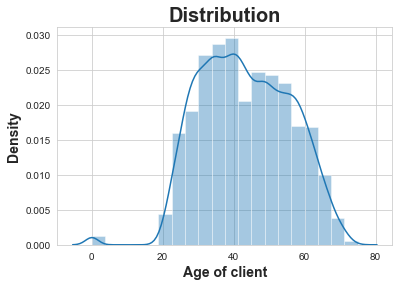

In [10]:
sns.distplot(df['dob_years'], bins=20)

plt.title('Distribution', size=20, weight='bold')
plt.xlabel('Age of client', size=14, weight='bold')
plt.ylabel(f'Density', size=14, weight='bold')

plt.show()

Null values got into the data on the age of customers, they will need to be eliminated, and also pay attention to whether the error is really caused by a human factor.

In [11]:
df.loc[df['dob_years'] == 0, 'income_type'].value_counts()

сотрудник      55
пенсионер      20
компаньон      20
госслужащий     6
Name: income_type, dtype: int64

In [12]:
age_medians = df.groupby('income_type')['dob_years'].median().astype('int')
age_medians

income_type
безработный        38
в декрете          39
госслужащий        40
компаньон          39
пенсионер          60
предприниматель    42
сотрудник          39
студент            22
Name: dob_years, dtype: int64

In [13]:
df.loc[(df['dob_years'] == 0) & (df['income_type'] == 'сотрудник'), 'dob_years'] = age_medians[6]
df.loc[(df['dob_years'] == 0) & (df['income_type'] == 'компаньон'), 'dob_years'] = age_medians[3]
df.loc[(df['dob_years'] == 0) & (df['income_type'] == 'пенсионер'), 'dob_years'] = age_medians[4]
df.loc[(df['dob_years'] == 0) & (df['income_type'] == 'госслужащий'), 'dob_years'] = age_medians[2]

In [14]:
df.loc[df['dob_years'] == 0, 'dob_years'].value_counts()

Series([], Name: dob_years, dtype: int64)

All Nan values in the age of clients are removed.

*Now you can deal with gaps in the `days_employed` column.*
1. Let's divide clients into categories by age.
2. Find the median values of working days by age category.
3. Fill in the gaps in the `days_employed` column with medians.

In [15]:
df['dob_years'].describe()

count    21525.000000
mean        43.496167
std         12.231538
min         19.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

Let's break down the age of customers into categories of 25%:
- up to 34 (inclusive) - category `'I'`
- from 35 to 43 (inclusive) - category ``II'`
- from 44 to 53 (inclusive) - category ``III'`
- after 53 - category ``IV'`


In [16]:
def dob_years_group(dob_years):
    if dob_years <= 34:
        return 'I'
    elif 35 <= dob_years <= 43:
        return 'II'
    elif 44 <= dob_years <= 53:
        return 'III'
    else:
        return 'IV'

In [17]:
df['dob_years_category'] = df['dob_years'].apply(dob_years_group)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_category
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,II
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,II
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,I
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,I
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,III


In [18]:
days_employed_medians = df.groupby('dob_years_category')['days_employed'].median().astype('int')

df.loc[(df['days_employed'].isna()) & (df['dob_years_category'] == 'I'), 'days_employed'] = days_employed_medians[0]
df.loc[(df['days_employed'].isna()) & (df['dob_years_category'] == 'II'), 'days_employed'] = days_employed_medians[1]
df.loc[(df['days_employed'].isna()) & (df['dob_years_category'] == 'III'), 'days_employed'] = days_employed_medians[2]
df.loc[(df['days_employed'].isna()) & (df['dob_years_category'] == 'IV'), 'days_employed'] = days_employed_medians[3]

**Resume**

1. Missing values in the monthly income column were filled in with the median values for each type of employment;
2. The zero age values were corrected for the medians of the corresponding type of employment;
3. Four categories were created according to the age of clients.
4. Missing values in the work experience data were processed based on the medians for each age category.

### Outliers

**`days_employed`**

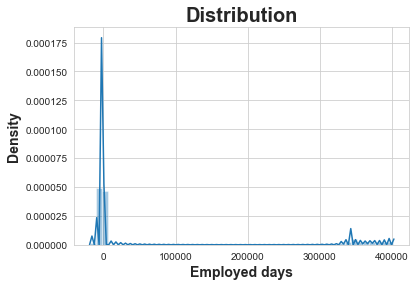

In [19]:
sns.distplot(df['days_employed'])
plt.title('Distribution', size=20, weight='bold')
plt.xlabel('Employed days', size=14, weight='bold')
plt.ylabel(f'Density', size=14, weight='bold')
plt.show()

We can see that there are both negative and positive values (but already on a scale of thousands of years). This will require information from the employees who unloaded this data: what exactly is meant by it.

In [20]:
df['days_employed'] = abs(df['days_employed'])

**`children`**

In [21]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


Two values are knocked out: -1 (apparently, when manually entered, - was accidentally added) and 20 (apparently, 2 children are meant). Let's fix these values.

In [22]:
df['children'] = abs(df['children'])

In [23]:
df.loc[df['children'] == 20, 'children'] = df.loc[df['children'] == 20, 'children'] / 10

In [24]:
df['children'].value_counts()

0.0    14149
1.0     4865
2.0     2131
3.0      330
4.0       41
5.0        9
Name: children, dtype: int64

**`dob_years`**

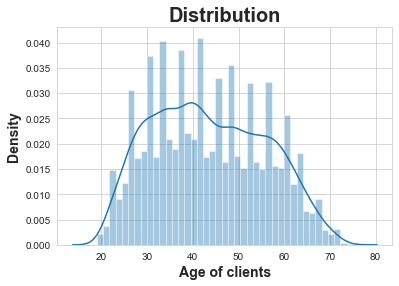

In [25]:
sns.distplot(df['dob_years'])
plt.title('Distribution', size=20, weight='bold')
plt.xlabel('Age of clients', size=14, weight='bold')
plt.ylabel('Density', size=14, weight='bold')
plt.show()

**`debt`**

In [26]:
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

**`education_id`**

In [27]:
df['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

**`family_status_id`**

In [28]:
df['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

**`total_income`**

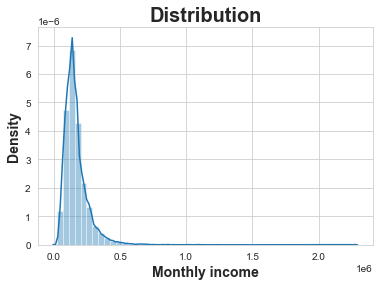

In [29]:
sns.distplot(df['total_income'])
plt.title('Distribution', size=20, weight='bold')
plt.xlabel('Monthly income', size=14, weight='bold')
plt.ylabel('Density', size=14, weight='bold')
plt.show()

**Resume**

Outliers were found in the `'days_employed'` and `'children'` columns, which were corrected for more specific values.

### Data types

In [30]:
df['total_income'] = df['total_income'].astype('int')
df['days_employed'] = df['days_employed'].astype('int')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_category
0,1.0,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,II
1,1.0,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,II
2,0.0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,I
3,3.0,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,I
4,0.0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,III


### Duplicates

In [31]:
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [32]:
df['education'] = df['education'].str.lower()
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [33]:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [34]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [35]:
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

In [36]:
df.duplicated().sum()

71

In [37]:
df = df.drop_duplicates().reset_index(drop=True)

In [38]:
df.duplicated().sum()

0

**Resume**

- Most likely, education info were filled in manually, hence the problem with the appearance of values in different registers, for example, "average", "Average", "AVERAGE". Developers should be informed about this in order to introduce restrictions on possible filling options.
- When processing data for duplicates by the `duplicated()` method, 71 identical rows were found, which were deleted. It is important to find out what caused their duplicates - a technical problem and a human factor.

### Additional dataframes of dictionaries, decomposition of the original dataframe.

In [39]:
education_df = df[['education_id', 'education']]
family_status_df = df[['family_status_id', 'family_status']]
display(education_df)

,education_id,education
0,0,высшее
1,1,среднее
2,1,среднее
3,1,среднее
4,1,среднее
...,...,...
21449,1,среднее
21450,1,среднее
21451,1,среднее
21452,1,среднее


In [40]:
df.drop(columns = ['education', 'family_status'])

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_category
0,1.0,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,II
1,1.0,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,II
2,0.0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,I
3,3.0,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,I
4,0.0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,III
...,...,...,...,...,...,...,...,...,...,...,...
21449,1.0,4529,43,1,1,F,компаньон,0,224791,операции с жильем,II
21450,0.0,343937,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,IV
21451,1.0,2113,38,1,1,M,сотрудник,1,89672,недвижимость,II
21452,3.0,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,II


### Total_income coding

Let's categorize clients by income.

Based on the selected ranges, we create a total_income_category column with categories:
0–30000 - 'E';
30001–50000 - 'D';
50001–200000 - 'C';
200001–1000000 - 'B';
1000001 and above is 'A'.

Let's create a function `total_income_group(total_income)` that we can use to create the `total_income_category` column.

In [41]:
def total_income_group(total_income):
    if 0 <= total_income <= 30000:
        return 'E'
    elif 30001 <= total_income <= 50000:
        return 'D'
    elif 50001 <= total_income <= 200000:
        return 'C'
    elif 200001 <= total_income <= 1000000:
        return 'B'
    else:
        return 'A'

In [42]:
df['total_income_category'] = df['total_income'].apply(total_income_group)
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_category,total_income_category
0,1.0,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,II,B
1,1.0,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,II,C
2,0.0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,I,C
3,3.0,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,I,B
4,0.0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,III,C
5,0.0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,I,B
6,0.0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,II,B
7,0.0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,III,C
8,2.0,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,II,C
9,0.0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,II,C


### Purpose_category coding

Among all the possible purposes of obtaining a loan, there are only 4 keywords that reflect the main goal: car, real estate and housing, wedding and education.

In accordance with them, we will form a new purpose_category column, which will include the following categories:
- 'car operations',
- 'real estate transactions',
- 'holding a wedding',
- 'getting an education'.

In [43]:
df['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

In [44]:
def purpose_group(purpose):
    if 'авто' in purpose:
        return 'операции с автомобилем'
    elif 'недвиж' in purpose or 'жиль'in purpose:
        return 'операции с недвижимостью'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    else:
        return 'получение образования'

In [45]:
df['purpose_category'] = df['purpose'].apply(purpose_group)

In [46]:
df['purpose_category'].value_counts()

операции с недвижимостью    10811
операции с автомобилем       4306
получение образования        4013
проведение свадьбы           2324
Name: purpose_category, dtype: int64

**Resume**

From the unique values of the loan purposes, 4 keywords were identified, on the basis of which we divided all customers into categories
- 'car transactions',
- 'real estate transactions',
- 'holding a wedding',
- 'getting an education'.

Categorization greatly simplifies the analysis and preserves the main meaning of the goal.

## Analysis

### Q1
Is there a relationship between having children and repaying a loan on time?

In [47]:
df_children_pivot = pd.pivot_table(df,
                                   index='children',
                                   columns='debt', 
                                   values='days_employed', 
                                   aggfunc='count', 
                                   fill_value=0)
df_children_pivot.head(10)

debt,0,1
children,,
0.0,13028,1063
1.0,4410,445
2.0,1926,202
3.0,303,27
4.0,37,4
5.0,9,0


In [48]:
df_children_pivot['fraction_with_debt'] = round(100 * df_children_pivot[1] / (df_children_pivot[0] + df_children_pivot[1]), 1)
df_children_pivot.sort_values(by='fraction_with_debt', ascending=False)

debt,0,1,fraction_with_debt
children,,,
4.0,37,4,9.8
2.0,1926,202,9.5
1.0,4410,445,9.2
3.0,303,27,8.2
0.0,13028,1063,7.5
5.0,9,0,0.0


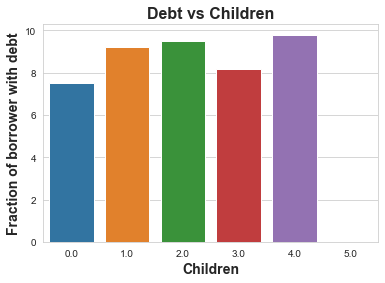

In [49]:
sns.barplot(data=df_children_pivot, x=df_children_pivot.index, y='fraction_with_debt')
plt.title('Debt vs Children', size=16, weight='bold')
plt.xlabel('Children', size=14, weight='bold')
plt.ylabel('Fraction of borrower with debt', size=14, weight='bold')
plt.show()

**Resume**
Clients with children have a higher probability of debts (9.2% vs. 7.5%, respectively), while the more children, the higher the probability (9.2% vs. 9.8%, respectively). Although people with 3 children pay more often than those with 1-2 children. Perhaps a larger sample is needed to refine the final conclusion.

### Q2
Is there a relationship between marital status and loan repayment on time?

In [50]:
df_family_pivot = pd.pivot_table(df,
                                index=['family_status_id'],
                                columns='debt',
                                values='days_employed',
                                aggfunc='count',
                                fill_value=0)

df_family_pivot.head(10)

debt,0,1
family_status_id,,
0,11408,931
1,3763,388
2,896,63
3,1110,85
4,2536,274


In [51]:
df_family_pivot['fraction_with_debt'] = round(100 * df_family_pivot[1] / (df_family_pivot[0] + df_family_pivot[1]), 1)
df_family_pivot.sort_values(by='fraction_with_debt', ascending=False) #выводим таблицу отсортированную по убыванию

debt,0,1,fraction_with_debt
family_status_id,,,
4,2536,274,9.8
1,3763,388,9.3
0,11408,931,7.5
3,1110,85,7.1
2,896,63,6.6


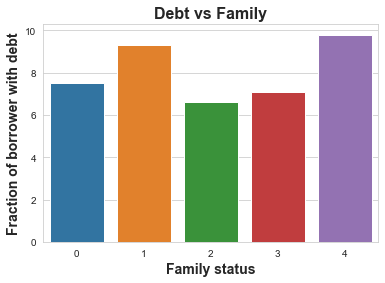

In [52]:
sns.barplot(data=df_family_pivot, x=df_family_pivot.index, y='fraction_with_debt')
plt.title('Debt vs Family', size=16, weight='bold')
plt.xlabel('Family status', size=14, weight='bold')
plt.ylabel('Fraction of borrower with debt', size=14, weight='bold')
plt.show()

**Resume**

There is a dependence on marital status. People who have not been married are more likely to have loan debts. At the same time, those who were married (now divorced or widowed) pay on time more often than those who are now married.

- single = 9.8%
- civil marriage = 9.3%
- married / married = 7.5%
- divorced = 7.1%
- widower / widow = 6.6%

### Q3
Is there a relationship between income level and loan repayment on time?

In [53]:
df_income_pivot = pd.pivot_table(df,
                                   index=['total_income_category'], 
                                   columns='debt', 
                                   values='days_employed', 
                                   aggfunc='count', 
                                   fill_value=0)
display(df_income_pivot.head(10)) 

debt,0,1
total_income_category,,
A,23,2
B,4686,356
C,14655,1360
D,329,21
E,20,2


In [54]:
df_income_pivot['fraction_with_debt'] = round(100 * df_income_pivot[1] / (df_income_pivot[0] + df_income_pivot[1]), 1)
df_income_pivot.sort_values(by='fraction_with_debt', ascending=False) #выводим таблицу отсортированную по убыванию

debt,0,1,fraction_with_debt
total_income_category,,,
E,20,2,9.1
C,14655,1360,8.5
A,23,2,8.0
B,4686,356,7.1
D,329,21,6.0


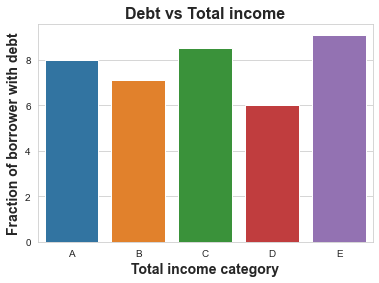

In [55]:
sns.barplot(data=df_income_pivot, x=df_income_pivot.index, y='fraction_with_debt')
plt.title('Debt vs Total income', size=16, weight='bold')
plt.xlabel('Total income category', size=14, weight='bold')
plt.ylabel('Fraction of borrower with debt', size=14, weight='bold')
plt.show()

**Resume**

The clients who earn the least (9.1%) have the largest number of debts. Probably their salary is not always enough to pay off the loan.
The most responsible clients are people with an average salary (6%), apparently they know how to control their budget, unlike those who earn more (7.1 - 8.5%).

income in the range up to 30000 rub. per month = 9.1%
income in the range from 50 to 200 thousand rub. = 8.5%
more than 1000 thousand rub. = 8.0%
income in the range from 200 to 1000 thousand rub. = 7.1%
income in the range from 30 to 50 thousand rub. = 6.0%

### Q4
How do different purposes of a loan affect its repayment on time?

In [56]:
df_purpose_pivot = pd.pivot_table(df,
                                   index=['purpose_category'], 
                                   columns='debt', 
                                   values='days_employed', 
                                   aggfunc='count', 
                                   fill_value=0)
display(df_purpose_pivot.head(10)) 

debt,0,1
purpose_category,,
операции с автомобилем,3903,403
операции с недвижимостью,10029,782
получение образования,3643,370
проведение свадьбы,2138,186


In [57]:
df_purpose_pivot['fraction_with_debt'] = round(100 * df_purpose_pivot[1] / (df_purpose_pivot[0] + df_purpose_pivot[1]), 1)
df_purpose_pivot.sort_values(by='fraction_with_debt', ascending=False) #выводим таблицу отсортированную по убыванию

debt,0,1,fraction_with_debt
purpose_category,,,
операции с автомобилем,3903,403,9.4
получение образования,3643,370,9.2
проведение свадьбы,2138,186,8.0
операции с недвижимостью,10029,782,7.2


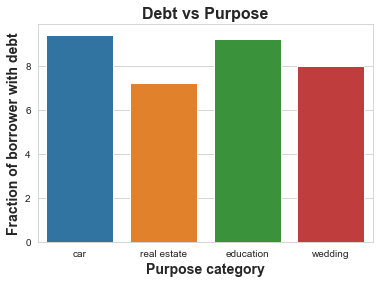

In [58]:
label = ['car', 'real estate', 'education', 'wedding']
sns.barplot(data=df_purpose_pivot, x=df_purpose_pivot.index, y='fraction_with_debt')
plt.title('Debt vs Purpose', size=16, weight='bold')
plt.xticks(ticks=[0, 1, 2, 3], labels=label)
plt.xlabel('Purpose category', size=14, weight='bold')
plt.ylabel('Fraction of borrower with debt', size=14, weight='bold')
plt.show()

**Resume**


Most often, clients with a loan for real estate (both residential and commercial) pay without delay 7.2%. Worst pay on loans for cars (7.2%).

- car - 9.4%
- education - 9.2%
- wedding - 8.0%
- real estate - 7.2%

## Conclusions

Factors that affect loan repayment on time include:
- Family status;
- Presence of children;
- Income;
- The purpose of the loan.

*The most preferred client for the bank may be a widower / widow without children with an income of 30 to 50 thousand rubles, who is going to buy real estate.*

In the future, it will be interesting to study the influence of gender, education, age and work experience of the client on the timely repayment of the loan.